In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ls

drive/  sample_data/


In [9]:
cd/content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [10]:
ls

Dataset/  nutrition.h5  Test_set/  Train_set/


In [12]:
!unzip /content/drive/MyDrive/Dataset

Archive:  /content/drive/MyDrive/Dataset.zip
replace Dataset/Test_set/APPLES/n07740461_10011.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Dataset/Test_set/APPLES/n07740461_10011.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Dataset/Test_set/APPLES/n07740461_10011.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [14]:
#setting parameter for Image Data agumentation to the training data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#Image Data agumentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/Train_set',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/Test_set',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 4118 images belonging to 5 classes.
Found 929 images belonging to 3 classes.


In [16]:
print(x_train.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [17]:
print(x_test.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2}


In [18]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 995, 1: 1354, 2: 1019, 3: 275, 4: 475})

In [19]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax')) # softmax for more than 2

In [20]:
classifier.summary()#summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [21]:
# Compiling the CNN
# categorical_crossentropy for more than 2
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
classifier.fit_generator(
    generator=x_train,steps_per_epoch = len(x_train),
        epochs=1, validation_data=x_test,validation_steps = len(x_test))# No of images in test set

<ipython-input-22-24fe8cbf128b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


824/824 [==============================] - 1499s 2s/step - loss: 0.5830 - accuracy: 0.7788 - val_loss: 0.6372 - val_accuracy: 0.7244


In [23]:
# Save the model
classifier.save('nutrition.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [25]:
model = load_model("/content/drive/MyDrive/Dataset/nutrition.h5")

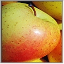

In [26]:
img = image.load_img("/content/drive/MyDrive/Dataset/Train_set/APPLES/n07740461_10037.jpg",target_size= (64,64))#loading of the image
img

In [27]:
x=image.img_to_array(img)#conversion image into array
x

array([[[177., 176., 174.],
        [155., 151., 148.],
        [155., 150., 144.],
        ...,
        [152., 152., 140.],
        [148., 149., 144.],
        [228., 226., 227.]],

       [[172., 168., 167.],
        [ 78.,  66.,  54.],
        [105.,  82.,  51.],
        ...,
        [152., 147.,  89.],
        [144., 142., 117.],
        [246., 245., 241.]],

       [[173., 169., 166.],
        [ 87.,  64.,  46.],
        [118.,  75.,  33.],
        ...,
        [191., 186.,  86.],
        [158., 155., 112.],
        [245., 246., 240.]],

       ...,

       [[173., 169., 168.],
        [ 87.,  59.,  56.],
        [ 85.,  30.,  23.],
        ...,
        [141.,  78.,  37.],
        [177., 148., 130.],
        [247., 243., 242.]],

       [[169., 167., 170.],
        [124., 112., 112.],
        [128., 104., 102.],
        ...,
        [142., 116., 103.],
        [161., 150., 144.],
        [246., 245., 243.]],

       [[240., 240., 240.],
        [240., 239., 237.],
        [242., 2

In [28]:
x.ndim


3

In [29]:
x=np.expand_dims(x,axis=0) #expand the dimension

In [30]:
x.ndim

4

In [31]:
pred = model.predict (x)

1/1 [==============================] - 0s 162ms/step


In [32]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [33]:
labels=['APPLE', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'ORANGE'